# Gensim Word2Vec Exercise
Word2Vec provides word embedding/vectors similar to other BOW techniques.

In [1]:
from gensim.models import Word2Vec, keyedvectors
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
import pandas as pd
import re

# Loading and preprocessing the text

* Loading the fake_or_real_news dataset explored in a previous categorical modelling project 
* Here we will train two Word2Vec models and dig into the results to see how fake and real contexts effect word similarity 

In [2]:
# Loading the Fake_Or_Real_News dataset used on aprevious project to compare the outputs between two models. 
df = pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Splitting the data by label and joining into single large Fake/Real Articles 
fake_text = ' '.join(df[df['label'] == 'FAKE']['text'])
real_text = ' '.join(df[df['label'] == 'REAL']['text'])

In [4]:
# Loading nltk's english stopwords
stop_words = stopwords.words('english')
# Replacing period (so sent tokenizer will be effective) with newline which punctuation does not include
punct = punctuation.replace('.','\n')

In [5]:
clean_fake = ' '.join([x.lower() for x in fake_text.split() if x not in stop_words])
clean_real = ' '.join([x.lower() for x in real_text.split() if x not in stop_words])

In [6]:
clean_fake[:200]

'daniel greenfield, shillman journalism fellow freedom center, new york writer focusing radical islam. in final stretch election, hillary rodham clinton gone war fbi. the word “unprecedented” thrown ar'

## Continuous Bag Of Words (CBOW) 
* The Continuous Bag Of Words method is the default method in Gensims Word2Vec
* Word vectors are given by summing the context words around a focus word in each tokenized sentence
* It's a more intuitive "fill in the blank" method
* Performs well for frequently occuring words 

### Tokenizing 
* Sent tokenize
* Word tokenize (keeps sentence context)

In [7]:
fake_sents = sent_tokenize(clean_fake)
real_sents = sent_tokenize(clean_real)

In [8]:
# Tokenizing the words in the sentence
fake_tokens = [word_tokenize(word) for word in fake_sents]
real_tokens = [word_tokenize(word) for word in real_sents]

In [9]:
# Investigating the parameters
### Word2Vec?
# size 
# sg : {0, 1}, optional - Training algorithm: 1 for skip-gram; otherwise CBOW.
# min_count : int, optional - Ignores all words with total frequency lower than this.

In [10]:
# Word2Vec trained on fake news articles - 32 indicates the word vector dimentions
fake_model = Word2Vec(fake_tokens, min_count = 2, size=32)
# Word2Vec trained on real news articles
real_model = Word2Vec(real_tokens, min_count = 2, size=32)

In [11]:
fake_model.wv.most_similar('trump')

[('trump.', 0.8198257684707642),
 ('hillary-haters', 0.7444265484809875),
 ('trump\x92s', 0.704358696937561),
 ('candidate', 0.6946581602096558),
 ('sanders', 0.6799047589302063),
 ('desorcy', 0.6679826974868774),
 ('70-year-old', 0.6605728268623352),
 ('hillary', 0.6584199070930481),
 ('swarmed', 0.6553019881248474),
 ('grope', 0.6494911909103394)]

In [12]:
real_model.wv.most_similar('trump')

[('close-up', 0.7536795139312744),
 ('sanders', 0.7437120676040649),
 ('tone', 0.6617224812507629),
 ('her', 0.6593756675720215),
 ('rubio', 0.6468309760093689),
 ('opponent', 0.6369951963424683),
 ('closely.', 0.6305043697357178),
 ('hillary', 0.6298797726631165),
 ('romney', 0.6213839054107666),
 ('candidacy', 0.62096107006073)]

In [13]:
vec = fake_model['man'] + fake_model['woman']
fake_model.wv.most_similar([vec])

/Users/darragh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('man', 0.9822843074798584),
 ('woman', 0.9688721299171448),
 ('daughter', 0.7918354868888855),
 ('walk', 0.7610307335853577),
 ('mom', 0.7563180923461914),
 ('son', 0.7543177604675293),
 ('crowd', 0.7472677826881409),
 ('wearing', 0.7454663515090942),
 ('grabbing', 0.743457019329071),
 ('guy', 0.7419409155845642)]

In [14]:
vec = real_model['hillary'] + real_model['president'] - real_model['man']
real_model.wv.most_similar([vec])

/Users/darragh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('hillary', 0.7668425440788269),
 ('president', 0.7022153735160828),
 ('mrs.', 0.6922193765640259),
 ('biden', 0.660505473613739),
 ('presidency', 0.658017635345459),
 ('barack', 0.6543709635734558),
 ('2008', 0.6308518648147583),
 ('galling', 0.6299290657043457),
 ('mrs', 0.6150175333023071),
 ('then-sen.', 0.614286482334137)]

In [15]:
vec = fake_model['president'] + fake_model['obama'] 
fake_model.wv.most_similar([vec])

/Users/darragh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('obama', 0.9317619204521179),
 ('president', 0.9123817682266235),
 ('bush', 0.8494398593902588),
 ('reagan', 0.8115055561065674),
 ('elected', 0.7972702980041504),
 ('obama…just', 0.7956979870796204),
 ('barack', 0.774834156036377),
 ('ghw', 0.7665234804153442),
 ('vice', 0.7615175843238831),
 ('biden', 0.7584903240203857)]

In [20]:
fake_model.wv.__getitem__('trump')

array([ 4.228237  , -3.9251635 , -1.4482098 ,  2.4057908 , -3.0442727 ,
       -1.8235399 ,  1.8512932 , -1.402143  , -2.4431744 , -1.1093745 ,
       -1.1359063 , -0.19910537,  1.3263811 ,  1.0380104 ,  2.9869459 ,
       -0.39002448,  4.7872734 , -6.068843  , -0.81973815, -5.6876726 ,
       -3.36632   , -2.653939  , -0.26327193,  1.7443084 , -7.43745   ,
        0.52641356,  1.4921589 ,  3.271331  ,  0.15123937,  1.8411915 ,
        3.462463  ,  1.8108625 ], dtype=float32)

In [21]:
real_model.wv.__getitem__('hillary')

array([ 3.4845526 , -3.37525   ,  1.0045516 , -0.51738644,  2.5704074 ,
        1.4231118 ,  0.9380261 ,  2.3207743 , -2.5620089 , -1.2702047 ,
       -0.75643456, -0.04120003,  0.849642  , -1.4694474 , -1.6565475 ,
       -0.8134011 ,  2.881749  , -3.8113887 , -1.531803  , -5.327609  ,
       -0.2994314 , -2.0396202 , -0.0491001 ,  0.5685656 , -3.4880357 ,
       -5.537089  ,  0.24730831,  1.4122114 , -1.1567963 ,  0.8908749 ,
       -1.9606335 ,  1.5790602 ], dtype=float32)

# Using the skipgram method
* Skip gram takes the focus word and tries to predict each of the context words one by one, has a tendency to perform best for rarer words
* When considering the negative sampling method the probablility of a context word is given by the dot product between the context word and the focus word.
Two factors to consider for skipgram are:
* Sampling Rate - Counters imbalance between rare and frequent words by setting a probability threshold (typically 10-5
* Negative sampling - Negative samples are random words in the output layer and they are selected using unigram distribution where the more frequent words are likely to be selected as negative samples

In [22]:
# Two important hyperparameters for skipgram
# Word2Vec?

In [23]:
# negative : int, optional - If > 0, negative sampling will be used, the int for negative 
# specifies how many "noise words" should be drawn (usually between 5-20)
# window : int, optional - Maximum distance between the current and predicted word within a sentence.

In [24]:
fake_model = Word2Vec(fake_tokens, min_count = 2, size=300, sg=1, negative=5, window = 15, workers = 20, sample = 1e-5)
real_model = Word2Vec(real_tokens, min_count = 2, size=300, sg=1, negative=5, window = 15, workers = 20, sample = 1e-5)

In [25]:
fake_model.wv.most_similar(negative='trump', topn=10)

[('e.u', 0.03097751922905445),
 ('ouch', 0.018951386213302612),
 ('www.womansvibe.com', -0.031805917620658875),
 ('horiboyable', -0.04107328876852989),
 ('eaten', -0.5475249290466309),
 ('reminding', -0.5758000612258911),
 ('turtles', -0.5799402594566345),
 ('birds', -0.5934424996376038),
 ('admiral', -0.5995962619781494),
 ('hatch', -0.6005132794380188)]

In [26]:
real_model.wv.most_similar(negative = 'trump')

[('h.l', 0.001577397808432579),
 ('f.l', -0.018940281122922897),
 ('s.e', -0.09751971065998077),
 ('syrian', -0.4433453381061554),
 ('syria', -0.4478425979614258),
 ('kurdish', -0.46645787358283997),
 ('isis', -0.47967594861984253),
 ('kobani', -0.497597873210907),
 ('iraq', -0.5125545263290405),
 ('fighters', -0.5128989815711975)]

In [27]:
# Reducing dimensions and plotting word graph
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model):
    num_dims = 2
    vectors = []
    labels = []
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)
        
    vectors = np.array(vectors)
    
    tsne = TSNE(n_components=num_dims, random_state=32)
    vectors = tsne.fit_transform(vectors)
    
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [28]:
fake_x_vals, fake_y_vals, fake_labels = reduce_dimensions(fake_model)
real_x_vals, real_y_vals, real_labels = reduce_dimensions(real_model)

In [29]:
def plot(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    
    random.seed(32)
    
    plt.figure(figsize=(12,12))
    plt.scatter(x_vals, y_vals)
    
    
    # Label a sample of the vocab
    indices = list(range(len(labels)))
    
    selected_indices = []
    index = labels.index('scandal')
    selected_indices.append(index)
    
    index=labels.index('viral')
    selected_indices.append(index)
    
    index=labels.index('iraq')
    selected_indices.append(index)
    
    
    
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
        


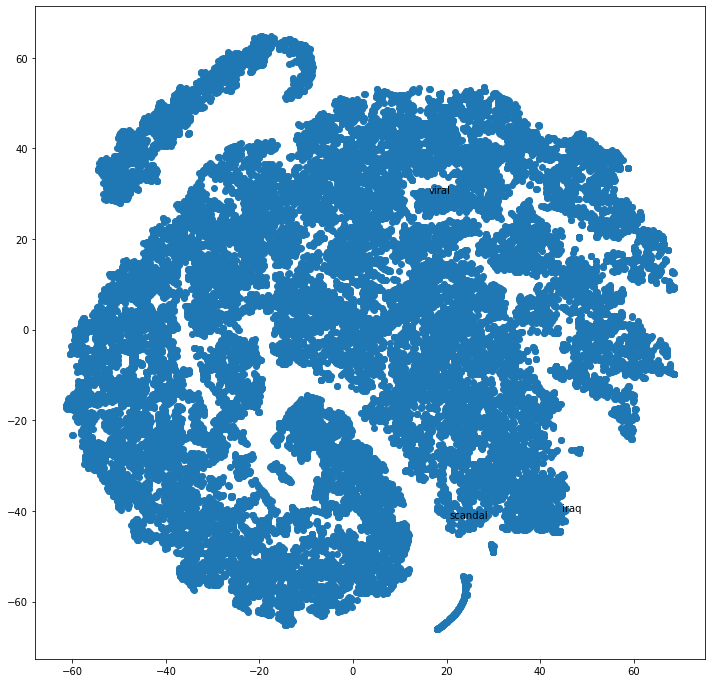

In [30]:
plot(fake_x_vals, fake_y_vals, fake_labels)

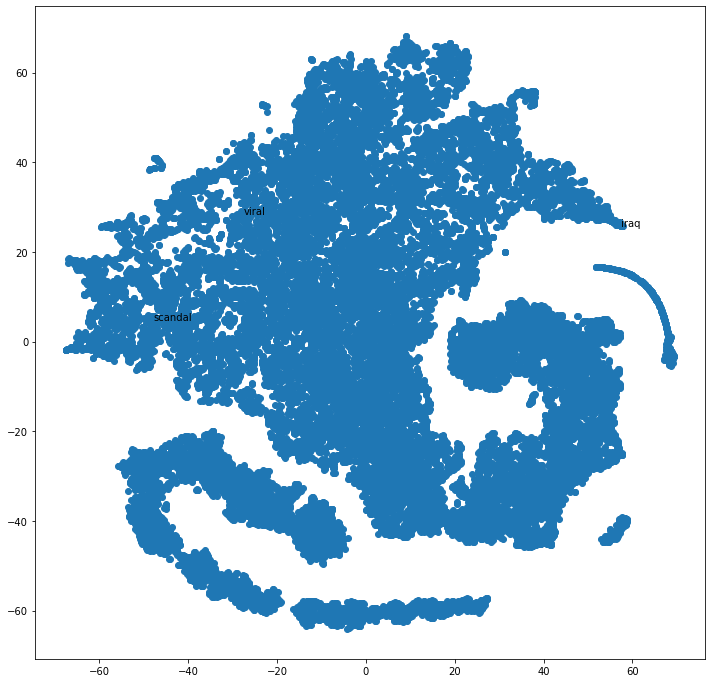

In [31]:
 plot(real_x_vals, real_y_vals, real_labels)